# DATA CLEANING COURSE PROJECT

In [229]:
# iMPORTING LIBRARIES

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 30)


import numpy as np
import json
import pprint
import urllib.request
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqline
import scipy.stats as scistat

### Data Information

HeartDisease : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

BMI: Body Mass Index (BMI)

Smoking: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]

AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

Stroke: (Ever told) (you had) a stroke?

PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)

MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)

DiffWalking: Do you have serious difficulty walking or climbing stairs?

Sex: Are you male or female?

AgeCategory: Fourteen-level age category

Race: Imputed race/ethnicity value

Diabetic: (Ever told) (you had) diabetes?

PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job

GenHealth: Would you say that in general your health is...

SleepTime: On average, how many hours of sleep do you get in a 24-hour period?

Asthma: (Ever told) (you had) asthma?

KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

SkinCancer: (Ever told) (you had) skin cancer?


In [230]:
# Importing the CSV data into the notebook for analysis

data = pd.read_csv('Heart_disease_dirty.csv')
data.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory.1,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,20.80,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,No,No,No
1,No,32.54,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,No,No,No
2,No,31.09,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,No,No,No
3,No,22.85,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,No,No,No
4,No,21.29,No,No,No,0.00,0.00,No,Female,65.00,NaN,No,Yes,Very good,8,No,No,No


In [231]:
# rename the data columns to better reflect the data in those columns
data.rename(columns={'HeartDisease' : 'Heart Disease'}, inplace=True)
data.rename(columns={'BMI' : 'Body Mass Index'}, inplace=True)
data.rename(columns={'AlcoholDrinking' : 'Alcohol Drinking'}, inplace=True)
data.rename(columns={'PhysicalHealth' : 'Physical Health'}, inplace=True)
data.rename(columns={'MentalHealth' : 'Mental Health'}, inplace=True)
data.rename(columns={'DiffWalking' : 'Difficult Walking'}, inplace=True)
data.rename(columns={'AgeCategory.1' : 'Age'}, inplace=True)
data.rename(columns={'PhysicalActivity' : 'Physical Activity'}, inplace=True)
data.rename(columns={'GenHealth' : 'Health In General'}, inplace=True)
data.rename(columns={'AgeCategory.1' : 'Age'}, inplace=True)
data

,Heart Disease,Body Mass Index,Smoking,Alcohol Drinking,Stroke,Physical Health,Mental Health,Difficult Walking,Sex,Age,Race,Diabetic,Physical Activity,Health In General,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,20.80,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,No,No,No
1,No,32.54,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,No,No,No
2,No,31.09,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,No,No,No
3,No,22.85,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,No,No,No
4,No,21.29,No,No,No,0.00,0.00,No,Female,65.00,NaN,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,No,NaN,Yes,No,No,2.00,0.00,No,Female,80.00,White,No,Yes,Very good,8,No,Yes,No
319791,Yes,32.96,Yes,No,No,2.00,0.00,No,Female,70.00,White,No,No,Very good,8,No,Yes,No
319792,No,31.62,No,No,No,2.00,0.00,Yes,Female,80.00,White,No,Yes,Very good,8,No,Yes,No
319793,No,23.18,No,No,No,2.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,No,Yes,Yes


In [232]:
# Display data types and the non-null count of all data columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Heart Disease      319795 non-null  object 
 1   Body Mass Index    319763 non-null  float64
 2   Smoking            319784 non-null  object 
 3   Alcohol Drinking   319769 non-null  object 
 4   Stroke             319784 non-null  object 
 5   Physical Health    319778 non-null  float64
 6   Mental Health      319778 non-null  float64
 7   Difficult Walking  319774 non-null  object 
 8   Sex                319761 non-null  object 
 9   Age                319764 non-null  float64
 10  Race               319750 non-null  object 
 11  Diabetic           319764 non-null  object 
 12  Physical Activity  319777 non-null  object 
 13  Health In General  319767 non-null  object 
 14  SleepTime          319795 non-null  int64  
 15  Asthma             319795 non-null  object 
 16  Ki

In [233]:
# Get categorical variables

catCols = data.select_dtypes("object").columns
catCols= list(set(catCols))

In [234]:
# checking the categorical columns
catCols

['Diabetic',
 'Race',
 'Sex',
 'Difficult Walking',
 'Asthma',
 'KidneyDisease',
 'Smoking',
 'Alcohol Drinking',
 'Health In General',
 'SkinCancer',
 'Heart Disease',
 'Stroke',
 'Physical Activity']

In [235]:
# Checking the frequecy of all categorical variables

In [236]:
data['KidneyDisease'].value_counts()

No     308016
Yes     11779
Name: KidneyDisease, dtype: int64

In [237]:
data['Health In General'].value_counts()

Very good    113842
Good          93121
Excellent     66838
Fair          34677
Poor          11289
Name: Health In General, dtype: int64

In [238]:
data['Alcohol Drinking'].value_counts()

No     298000
Yes     21769
Name: Alcohol Drinking, dtype: int64

In [239]:
data['Smoking'].value_counts()

No     187884
Yes    131900
Name: Smoking, dtype: int64

In [240]:
data['Heart Disease'].value_counts()

No     292422
Yes     27373
Name: Heart Disease, dtype: int64

In [241]:
data['Stroke'].value_counts()

No     307715
Yes     12069
Name: Stroke, dtype: int64

In [242]:
data['Stroke'].value_counts()

No     307715
Yes     12069
Name: Stroke, dtype: int64

In [243]:
data['Diabetic'].value_counts()

No                         269622
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [244]:
data['Race'].value_counts()

White                             245171
Hispanic                           27446
Black                              22935
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [245]:
data['Physical Activity'].value_counts()

Yes    247943
No      71834
Name: Physical Activity, dtype: int64

In [246]:
data['Asthma'].value_counts()

No     276923
Yes     42872
Name: Asthma, dtype: int64

In [247]:
data['Sex'].value_counts()

Female    167789
Male      151972
Name: Sex, dtype: int64

In [248]:
data['SkinCancer'].value_counts()

No     289861
Yes     29819
Name: SkinCancer, dtype: int64

In [249]:
data[ 'Difficult Walking'].value_counts()

No     275364
Yes     44410
Name: Difficult Walking, dtype: int64

In [250]:
#From Categorical To Boolean
#Some categorical columns are actually boolean. Transforming those data into boolean for convenience purpose.

#Diabetic has four unique values: Yes, No, No, borderline diabetes, Yes (during pregnancy).
data.replace({'Diabetic': {'No, borderline diabetes': 'No'}}, inplace=True)
data.replace({'Diabetic': {'Yes (during pregnancy)': 'Yes'}}, inplace=True)

In [251]:
bool_cols = []
# Values for columns with 2 unique values
print('Values for columns with 2 unique values')
print('======================================')
for col in data.columns:
    if data[col].unique().shape[0] == 2:
        print("'{}' unique values: {}".format(col, data[col].unique()))
        bool_cols.append(col)

Values for columns with 2 unique values
'Heart Disease' unique values: ['No' 'Yes']
'Asthma' unique values: ['No' 'Yes']
'KidneyDisease' unique values: ['No' 'Yes']


In [252]:
# Transform into boolean
for col in bool_cols:
    data.replace({col: {'Yes': True, 'No': False}}, inplace=True)

In [253]:
#data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Heart Disease      319795 non-null  bool   
 1   Body Mass Index    319763 non-null  float64
 2   Smoking            319784 non-null  object 
 3   Alcohol Drinking   319769 non-null  object 
 4   Stroke             319784 non-null  object 
 5   Physical Health    319778 non-null  float64
 6   Mental Health      319778 non-null  float64
 7   Difficult Walking  319774 non-null  object 
 8   Sex                319761 non-null  object 
 9   Age                319764 non-null  float64
 10  Race               319750 non-null  object 
 11  Diabetic           319764 non-null  object 
 12  Physical Activity  319777 non-null  object 
 13  Health In General  319767 non-null  object 
 14  SleepTime          319795 non-null  int64  
 15  Asthma             319795 non-null  bool   
 16  Ki

In [254]:
# Getting the numerical columns from the data
numCols = data.select_dtypes("number").columns
numCols

Index(['Body Mass Index', 'Physical Health', 'Mental Health', 'Age',
       'SleepTime'],
      dtype='object')

In [255]:
numcol = ['Body Mass Index', 'Physical Health', 'Mental Health', 'Age',
       'SleepTime']

In [256]:
#Numerical Data summary

data[numcol].describe()

,Body Mass Index,Physical Health,Mental Health,Age,SleepTime
count,"319,763.00","319,778.00","319,778.00","319,764.00","319,795.00"
mean,28.33,3.37,3.90,52.44,7.10
std,6.36,7.95,7.96,18.07,1.44
min,12.02,0.00,0.00,18.00,1.00
25%,24.03,0.00,0.00,40.00,6.00
50%,27.34,0.00,0.00,55.00,7.00
75%,31.43,2.00,3.00,65.00,8.00
max,94.85,30.00,30.00,80.00,24.00


In [257]:
#checking for null datas

data.isnull()

,Heart Disease,Body Mass Index,Smoking,Alcohol Drinking,Stroke,Physical Health,Mental Health,Difficult Walking,Sex,Age,Race,Diabetic,Physical Activity,Health In General,SleepTime,Asthma,KidneyDisease,SkinCancer
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319791,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319792,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319793,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [258]:
#checking for null values in columns
Counts_X = data.isnull().sum(axis=0)
Counts_X 

Heart Disease          0
Body Mass Index       32
Smoking               11
Alcohol Drinking      26
Stroke                11
Physical Health       17
Mental Health         17
Difficult Walking     21
Sex                   34
Age                   31
Race                  45
Diabetic              31
Physical Activity     18
Health In General     28
SleepTime              0
Asthma                 0
KidneyDisease          0
SkinCancer           115
dtype: int64

In [259]:
#checking for null values in rows

Counts_Y = data.isnull().max(axis=1)
Counts_Y

0         False
1         False
2         False
3         False
4          True
          ...  
319790     True
319791    False
319792    False
319793    False
319794    False
Length: 319795, dtype: bool

In [260]:
# check for missing values
print(f' The number of missing values {data.isna().sum()}')
print('\n')
print(f' The percentage of missing values {data.isna().mean()* 100}')

 The number of missing values Heart Disease          0
Body Mass Index       32
Smoking               11
Alcohol Drinking      26
Stroke                11
Physical Health       17
Mental Health         17
Difficult Walking     21
Sex                   34
Age                   31
Race                  45
Diabetic              31
Physical Activity     18
Health In General     28
SleepTime              0
Asthma                 0
KidneyDisease          0
SkinCancer           115
dtype: int64


 The percentage of missing values Heart Disease       0.00
Body Mass Index     0.01
Smoking             0.00
Alcohol Drinking    0.01
Stroke              0.00
Physical Health     0.01
Mental Health       0.01
Difficult Walking   0.01
Sex                 0.01
Age                 0.01
Race                0.01
Diabetic            0.01
Physical Activity   0.01
Health In General   0.01
SleepTime           0.00
Asthma              0.00
KidneyDisease       0.00
SkinCancer          0.04
dtype: float64


In [261]:
# Dropping all null values


data.dropna(subset=['Body Mass Index'], inplace=True)
data.dropna(subset=['Alcohol Drinking'], inplace=True)
data.dropna(subset=['Physical Health'], inplace=True)
data.dropna(subset=['Mental Health'], inplace=True)
data.dropna(subset=['Difficult Walking'], inplace=True)
data.dropna(subset=['Sex'], inplace=True)
data.dropna(subset=['Age'], inplace=True)
data.dropna(subset=['Race'], inplace=True)
data.dropna(subset=['Diabetic'], inplace=True)
data.dropna(subset=['Physical Activity'], inplace=True)
data.dropna(subset=['Health In General'], inplace=True)
data.dropna(subset=['SkinCancer'], inplace=True)

In [262]:
# check for missing values
print(f' The percentage of missing values {data.isna().mean()* 100}')

 The percentage of missing values Heart Disease       0.00
Body Mass Index     0.00
Smoking             0.00
Alcohol Drinking    0.00
Stroke              0.00
Physical Health     0.00
Mental Health       0.00
Difficult Walking   0.00
Sex                 0.00
Age                 0.00
Race                0.00
Diabetic            0.00
Physical Activity   0.00
Health In General   0.00
SleepTime           0.00
Asthma              0.00
KidneyDisease       0.00
SkinCancer          0.00
dtype: float64


In [263]:
#Checking the data types of the columns

data .dtypes

Heart Disease           bool
Body Mass Index      float64
Smoking               object
Alcohol Drinking      object
Stroke                object
Physical Health      float64
Mental Health        float64
Difficult Walking     object
Sex                   object
Age                  float64
Race                  object
Diabetic              object
Physical Activity     object
Health In General     object
SleepTime              int64
Asthma                  bool
KidneyDisease           bool
SkinCancer            object
dtype: object

In [264]:
# Shape of the data, row and column
data.shape

(319605, 18)

In [265]:
#defining your new data to contain just numerical data

numonly = data.loc[:, numcol]
numonly

,Body Mass Index,Physical Health,Mental Health,Age,SleepTime
0,20.80,0.00,0.00,65.00,8
1,32.54,0.00,0.00,65.00,8
2,31.09,0.00,0.00,65.00,8
3,22.85,0.00,0.00,65.00,8
11,27.44,0.00,0.00,65.00,8
...,...,...,...,...,...
319785,25.77,2.00,0.00,70.00,8
319791,32.96,2.00,0.00,70.00,8
319792,31.62,2.00,0.00,80.00,8
319793,23.18,2.00,0.00,65.00,8


In [266]:
#checking for the distribution of numerical columns
numonly.describe()

,Body Mass Index,Physical Health,Mental Health,Age,SleepTime
count,"319,605.00","319,605.00","319,605.00","319,605.00","319,605.00"
mean,28.33,3.37,3.90,52.43,7.10
std,6.36,7.95,7.96,18.07,1.44
min,12.02,0.00,0.00,18.00,1.00
25%,24.03,0.00,0.00,40.00,6.00
50%,27.34,0.00,0.00,55.00,7.00
75%,31.44,2.00,3.00,65.00,8.00
max,94.85,30.00,30.00,80.00,24.00


In [267]:
# Skewness of the data

numonly.skew()   #highly skewed

Body Mass Index    1.33
Physical Health    2.60
Mental Health      2.33
Age               -0.31
SleepTime          0.68
dtype: float64

In [268]:
# TEST FOR NORMALITY

def testnorm(var, data):
    stat, p = scistat.shapiro(data[var])
    return p

In [269]:
testnorm("Body Mass Index", numonly)

C:\Users\EzekielJoaquim\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

In [270]:
testnorm("Physical Health", numonly)

0.0

In [271]:
testnorm("Mental Health", numonly)

0.0

In [272]:
testnorm("Age", numonly)

0.0

In [273]:
testnorm("SleepTime", numonly)

0.0

In [274]:
#custom function for outlier detection

def getOuliers():
    dfOut = pd.DataFrame(columns=numonly.columns, data=None)
    
    for col in numonly.columns[1:]:
        thirdQ = numonly[col].quantile(0.75)
        firstQ = numonly[col].quantile(0.25)
        outlierRange = 1.5*(thirdQ - firstQ)
        lowOutlier = firstQ - outlierRange
        highOutlier = thirdQ + outlierRange
        
        df1 = numonly.loc[(numonly[col] > highOutlier) | (numonly[col] < lowOutlier)]
        
        df1= data.assign(varname = col, threshlow = lowOutlier, threshhigh = highOutlier)
        
        dfOut = pd.concat([dfOut, df1])
    
    return dfOut

In [275]:
outliers = getOuliers()
outliers

,Body Mass Index,Physical Health,Mental Health,Age,SleepTime,Heart Disease,Smoking,Alcohol Drinking,Stroke,Difficult Walking,Sex,Race,Diabetic,Physical Activity,Health In General,Asthma,KidneyDisease,SkinCancer,varname,threshlow,threshhigh
0,20.80,0.00,0.00,65.00,8,False,No,No,No,No,Female,White,No,Yes,Very good,False,False,No,Physical Health,-3.00,5.00
1,32.54,0.00,0.00,65.00,8,False,No,No,No,No,Female,White,No,Yes,Very good,False,False,No,Physical Health,-3.00,5.00
2,31.09,0.00,0.00,65.00,8,False,No,No,No,No,Female,White,No,Yes,Very good,False,False,No,Physical Health,-3.00,5.00
3,22.85,0.00,0.00,65.00,8,False,No,No,No,No,Female,White,No,Yes,Very good,False,False,No,Physical Health,-3.00,5.00
11,27.44,0.00,0.00,65.00,8,False,No,No,No,No,Female,White,No,Yes,Very good,False,False,No,Physical Health,-3.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319785,25.77,2.00,0.00,70.00,8,False,Yes,No,No,No,Male,White,No,Yes,Very good,False,True,Yes,SleepTime,3.00,11.00
319791,32.96,2.00,0.00,70.00,8,True,Yes,No,No,No,Female,White,No,No,Very good,False,True,No,SleepTime,3.00,11.00
319792,31.62,2.00,0.00,80.00,8,False,No,No,No,Yes,Female,White,No,Yes,Very good,False,True,No,SleepTime,3.00,11.00
319793,23.18,2.00,0.00,65.00,8,False,No,No,No,No,Female,White,No,Yes,Very good,False,True,Yes,SleepTime,3.00,11.00


In [276]:
# Making a histogram for the numerical column. Making sure to use appropriate number of bins and appropriate histogram labels.

numlogs = numonly.copy()
for col in numonly.columns[1:]:
        numlogs[col] = np.log1p(numlogs[col])

(array([226404.,      0.,  10489.,  14875.,  13085.,   8876.,  11186.,
          3674.,   8675.,  22341.]),
 array([0.        , 0.34339872, 0.68679744, 1.03019616, 1.37359488,
        1.7169936 , 2.06039232, 2.40379104, 2.74718976, 3.09058848,
        3.4339872 ]),
 <BarContainer object of 10 artists>)

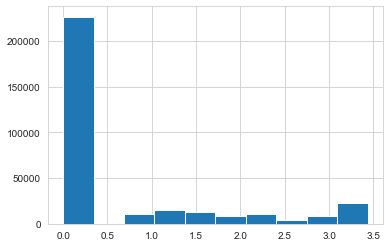

In [277]:
plt.hist(numlogs["Physical Health" ], bins=10)

(array([1.72750e+04, 1.71991e+05, 1.00807e+05, 2.33170e+04, 4.88800e+03,
        9.37000e+02, 2.61000e+02, 8.70000e+01, 2.90000e+01, 1.30000e+01]),
 array([12.02 , 20.303, 28.586, 36.869, 45.152, 53.435, 61.718, 70.001,
        78.284, 86.567, 94.85 ]),
 <BarContainer object of 10 artists>)

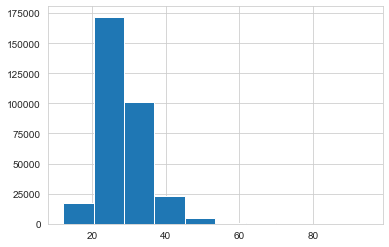

In [278]:
plt.hist(numlogs["Body Mass Index" ], bins=10)

(array([205220.,      0.,   9290.,  16495.,  15837.,  15659.,  17338.,
          2998.,  15839.,  20929.]),
 array([0.        , 0.34339872, 0.68679744, 1.03019616, 1.37359488,
        1.7169936 , 2.06039232, 2.40379104, 2.74718976, 3.09058848,
        3.4339872 ]),
 <BarContainer object of 10 artists>)

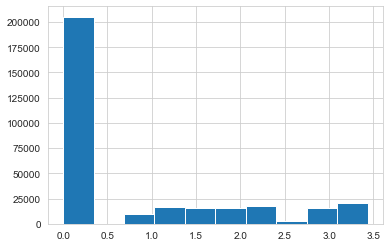

In [279]:
plt.hist(numlogs["Mental Health"], bins=10)

(array([ 21063.,  35703.,  41551.,  76924., 144364.]),
 array([2.94443898, 3.23444101, 3.52444305, 3.81444508, 4.10444712,
        4.39444915]),
 <BarContainer object of 5 artists>)

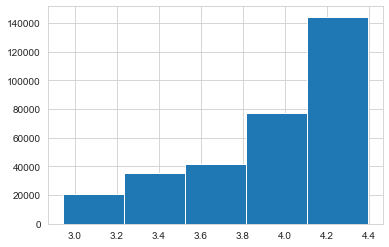

In [280]:
plt.hist(numlogs["Age" ], bins=5)

(array([5.5100e+02, 7.8800e+02, 1.9920e+03, 7.7500e+03, 8.5890e+04,
        1.9518e+05, 2.3835e+04, 2.9600e+03, 5.4800e+02, 1.1100e+02]),
 array([0.69314718, 0.94572004, 1.19829291, 1.45086577, 1.70343864,
        1.9560115 , 2.20858437, 2.46115723, 2.7137301 , 2.96630296,
        3.21887582]),
 <BarContainer object of 10 artists>)

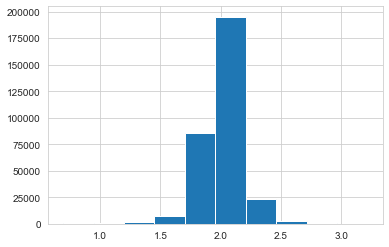

In [281]:
plt.hist(numlogs["SleepTime" ], bins=10)

In [282]:
#correlation

numonly.corr()

,Body Mass Index,Physical Health,Mental Health,Age,SleepTime
Body Mass Index,1.00,0.11,0.06,-0.00,-0.05
Physical Health,0.11,1.00,0.29,0.11,-0.06
Mental Health,0.06,0.29,1.00,-0.16,-0.12
Age,-0.00,0.11,-0.16,1.00,0.10
SleepTime,-0.05,-0.06,-0.12,0.10,1.00


In [283]:
#redefining numercal columns

Correlation_Data= numonly
Correlation_Data

,Body Mass Index,Physical Health,Mental Health,Age,SleepTime
0,20.80,0.00,0.00,65.00,8
1,32.54,0.00,0.00,65.00,8
2,31.09,0.00,0.00,65.00,8
3,22.85,0.00,0.00,65.00,8
11,27.44,0.00,0.00,65.00,8
...,...,...,...,...,...
319785,25.77,2.00,0.00,70.00,8
319791,32.96,2.00,0.00,70.00,8
319792,31.62,2.00,0.00,80.00,8
319793,23.18,2.00,0.00,65.00,8


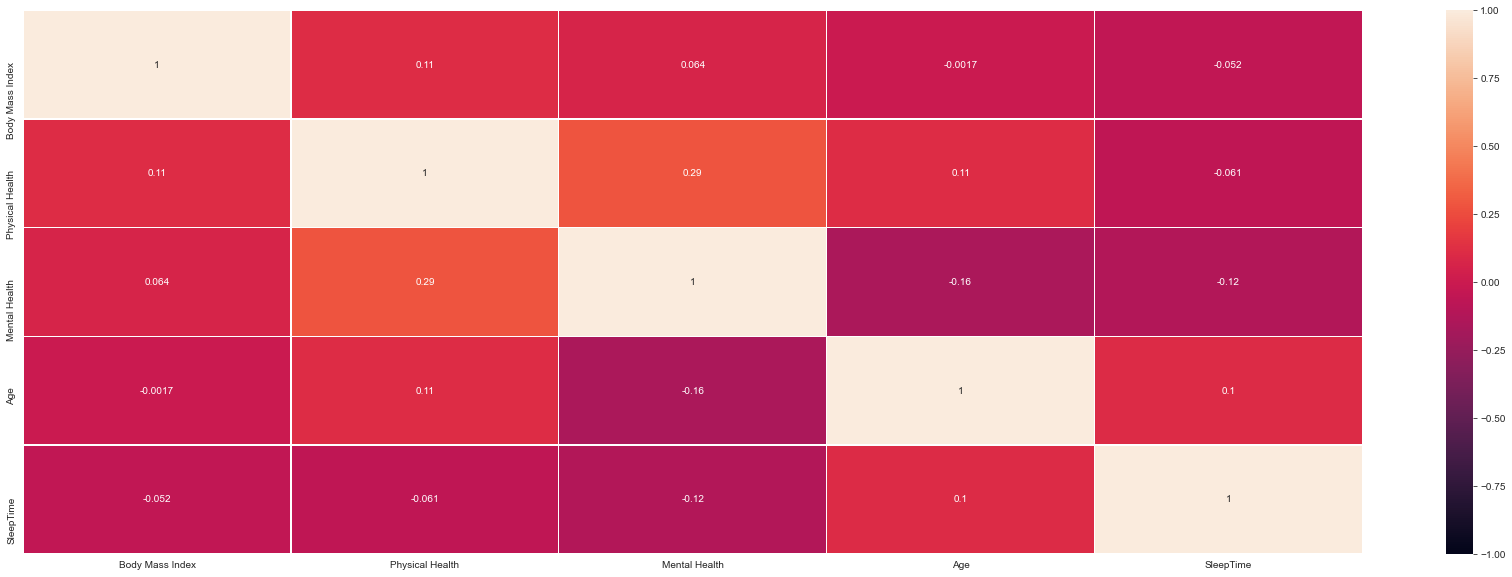

In [284]:
#Using Sea born to view the correlations


corra = Correlation_Data.corr() #correlation
fig = plt.figure(figsize=(30,10)) #sizing
#plots heat map
ax = sns.heatmap(corra, xticklabels=corra.columns,
                 yticklabels=corra.columns, annot=True, linewidths=.2, vmin=-1, vmax=1)

In [285]:
# Using Loc to better understand the data
data_senioradult = data.loc[(data['Age']>=45.00)]
data_senioradult

,Heart Disease,Body Mass Index,Smoking,Alcohol Drinking,Stroke,Physical Health,Mental Health,Difficult Walking,Sex,Age,Race,Diabetic,Physical Activity,Health In General,SleepTime,Asthma,KidneyDisease,SkinCancer
0,False,20.80,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,False,False,No
1,False,32.54,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,False,False,No
2,False,31.09,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,False,False,No
3,False,22.85,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,False,False,No
11,False,27.44,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,False,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319785,False,25.77,Yes,No,No,2.00,0.00,No,Male,70.00,White,No,Yes,Very good,8,False,True,Yes
319791,True,32.96,Yes,No,No,2.00,0.00,No,Female,70.00,White,No,No,Very good,8,False,True,No
319792,False,31.62,No,No,No,2.00,0.00,Yes,Female,80.00,White,No,Yes,Very good,8,False,True,No
319793,False,23.18,No,No,No,2.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,False,True,Yes


In [286]:
data_youngadult = data.loc[(data['Age']<=30.00)]
data_youngadult 

,Heart Disease,Body Mass Index,Smoking,Alcohol Drinking,Stroke,Physical Health,Mental Health,Difficult Walking,Sex,Age,Race,Diabetic,Physical Activity,Health In General,SleepTime,Asthma,KidneyDisease,SkinCancer
3971,False,19.37,No,No,No,0.00,0.00,No,Female,18.00,White,No,Yes,Very good,8,False,False,No
3972,False,25.10,No,No,No,0.00,0.00,No,Female,18.00,White,No,Yes,Very good,8,False,False,No
3973,False,19.66,No,No,No,0.00,0.00,No,Female,18.00,White,No,Yes,Very good,8,False,False,No
3974,False,21.63,No,No,No,0.00,0.00,No,Female,18.00,White,No,Yes,Very good,8,False,False,No
3975,False,22.30,No,No,No,0.00,0.00,No,Female,18.00,White,No,Yes,Very good,8,False,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319700,False,36.25,No,No,No,2.00,0.00,No,Male,25.00,White,No,Yes,Very good,8,False,False,No
319701,False,17.18,No,No,No,2.00,0.00,No,Female,30.00,White,No,Yes,Very good,8,False,False,No
319708,False,28.27,No,No,No,2.00,0.00,No,Male,18.00,White,No,Yes,Very good,8,False,False,No
319722,False,23.63,No,No,No,2.00,0.00,No,Male,18.00,White,No,Yes,Very good,8,False,False,No


In [287]:
data_BMI = data.loc[(data['Body Mass Index']>=28.33)]
data_BMI

,Heart Disease,Body Mass Index,Smoking,Alcohol Drinking,Stroke,Physical Health,Mental Health,Difficult Walking,Sex,Age,Race,Diabetic,Physical Activity,Health In General,SleepTime,Asthma,KidneyDisease,SkinCancer
1,False,32.54,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,False,False,No
2,False,31.09,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,False,False,No
22,False,35.43,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,False,False,No
36,False,29.18,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,False,False,No
38,False,39.68,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,False,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319783,False,31.31,No,No,No,2.00,0.00,No,Female,70.00,White,No,Yes,Very good,8,True,True,No
319784,False,32.10,No,No,No,2.00,0.00,No,Male,45.00,White,No,Yes,Very good,8,False,True,No
319791,True,32.96,Yes,No,No,2.00,0.00,No,Female,70.00,White,No,No,Very good,8,False,True,No
319792,False,31.62,No,No,No,2.00,0.00,Yes,Female,80.00,White,No,Yes,Very good,8,False,True,No


In [288]:
#Using Groupby to better understand the data

data.groupby(['Age', 'Smoking', 'Stroke'])['Body Mass Index'].mean()

Age    Smoking  Stroke
18.00  No       No       25.67
                Yes      27.80
       Yes      No       26.23
                Yes      22.98
25.00  No       No       27.57
                Yes      28.68
       Yes      No       27.94
                Yes      29.53
30.00  No       No       28.30
                Yes      30.21
       Yes      No       28.63
                Yes      31.00
35.00  No       No       28.58
                Yes      30.70
       Yes      No       29.16
                Yes      29.81
40.00  No       No       28.99
                Yes      30.98
       Yes      No       29.42
                Yes      30.49
45.00  No       No       29.31
                Yes      32.35
       Yes      No       29.64
                Yes      31.57
50.00  No       No       29.29
                Yes      31.57
       Yes      No       29.50
                Yes      31.05
55.00  No       No       29.07
                Yes      31.36
       Yes      No       29.04
                

In [289]:
data.groupby(['Age', 'Sex'])['Body Mass Index'].mean()

Age    Sex   
18.00  Female   25.83
       Male     25.71
25.00  Female   27.98
       Male     27.43
30.00  Female   28.61
       Male     28.28
35.00  Female   28.84
       Male     28.83
40.00  Female   29.02
       Male     29.40
45.00  Female   29.29
       Male     29.70
50.00  Female   29.16
       Male     29.72
55.00  Female   28.86
       Male     29.36
60.00  Female   28.53
       Male     29.14
65.00  Female   28.53
       Male     28.86
70.00  Female   27.94
       Male     28.47
75.00  Female   27.34
       Male     27.93
80.00  Female   25.92
       Male     26.69
Name: Body Mass Index, dtype: float64

In [290]:
data_sexage = data.groupby(['Sex'])['Age'].mean()
data_sexage 

Sex
Female   53.59
Male     51.16
Name: Age, dtype: float64

In [291]:
# Running the KNN model, generating anomaly scores in order to find potential outliers. 

In [292]:
from pyod.models.knn import KNN

In [293]:
from sklearn.preprocessing import StandardScaler

In [294]:
standardizer = StandardScaler()

In [295]:
analysisvars = ['Age', 'SleepTime']

In [296]:
df_v = data.loc[:, analysisvars].dropna()

In [297]:
df_vSTD = standardizer.fit_transform(df_v.iloc[:, 1:])

In [298]:
df_vSTD

array([[0.62898121],
       [0.62898121],
       [0.62898121],
       ...,
       [0.62898121],
       [0.62898121],
       [0.62898121]])

In [299]:
clf_name = 'KNN'
clf= KNN(contamination=0.1)
clf.fit(df_vSTD)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [300]:
y_pred = clf.labels_
y_scores = clf.decision_scores_

In [301]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [302]:
y_scores

array([0., 0., 0., ..., 0., 0., 0.])

In [303]:
predictions = pd.DataFrame(zip(y_pred, y_scores), columns=['outlier', 'scores'], index=df_v.index)

In [304]:
predictions.sample(10)

,outlier,scores
90554,0,0.00
295619,0,0.00
16227,0,0.00
84243,0,0.00
117341,0,0.00
198053,0,0.00
289477,0,0.00
202843,0,0.00
241192,0,0.00
206371,0,0.00


In [305]:
predictions.outlier.value_counts()

0    319597
1         8
Name: outlier, dtype: int64

In [306]:
predictions.groupby(['outlier'])[['scores']].agg(['min', 'median', 'max'])

scores            
           min median  max
outlier                   
0         0.00   0.00 0.00
1         0.70   0.70 0.70

In [307]:
#Sorting data using Age

In [308]:
df = data.sort_values(['Age'])

In [309]:
df

,Heart Disease,Body Mass Index,Smoking,Alcohol Drinking,Stroke,Physical Health,Mental Health,Difficult Walking,Sex,Age,Race,Diabetic,Physical Activity,Health In General,SleepTime,Asthma,KidneyDisease,SkinCancer
223481,False,24.39,No,No,No,0.00,3.00,No,Male,18.00,White,No,Yes,Very good,7,False,False,No
182986,False,24.41,Yes,No,No,0.00,5.00,No,Male,18.00,White,No,No,Good,10,False,False,No
211633,False,19.37,No,No,No,0.00,2.00,No,Female,18.00,White,No,Yes,Excellent,7,False,False,No
244883,False,17.94,No,No,No,15.00,0.00,No,Female,18.00,Asian,No,Yes,Good,6,False,False,No
24631,False,18.18,No,No,No,0.00,0.00,No,Male,18.00,White,No,Yes,Excellent,8,False,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70254,True,27.69,Yes,No,No,0.00,0.00,No,Male,80.00,White,No,Yes,Very good,7,False,False,Yes
112517,False,27.46,No,No,No,0.00,0.00,Yes,Female,80.00,White,No,Yes,Very good,9,False,False,No
70255,True,31.71,No,No,No,0.00,0.00,No,Female,80.00,White,No,Yes,Very good,7,False,False,No
39618,False,24.89,Yes,No,No,0.00,0.00,No,Female,80.00,White,Yes,Yes,Very good,8,False,False,Yes


In [310]:
#Sorting by Body Mass Index
df.sort_values(by='Body Mass Index')

,Heart Disease,Body Mass Index,Smoking,Alcohol Drinking,Stroke,Physical Health,Mental Health,Difficult Walking,Sex,Age,Race,Diabetic,Physical Activity,Health In General,SleepTime,Asthma,KidneyDisease,SkinCancer
204620,False,12.02,Yes,No,No,0.00,30.00,No,Male,18.00,White,No,Yes,Good,8,False,False,No
228806,False,12.02,No,No,No,30.00,30.00,No,Female,55.00,Black,No,No,Poor,6,False,False,No
34305,False,12.08,Yes,No,No,0.00,0.00,Yes,Male,30.00,White,No,Yes,Good,8,False,False,No
65723,False,12.13,No,No,No,0.00,0.00,No,Male,60.00,White,No,Yes,Excellent,7,False,False,No
156950,False,12.16,No,No,No,0.00,0.00,No,Male,35.00,Black,No,Yes,Very good,8,False,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245644,False,92.53,Yes,No,No,7.00,0.00,Yes,Female,65.00,Black,Yes,Yes,Poor,8,True,False,No
238245,False,93.86,Yes,Yes,No,30.00,30.00,Yes,Female,65.00,Other,Yes,No,Poor,4,True,True,No
274906,False,93.97,Yes,No,No,20.00,25.00,Yes,Female,50.00,White,No,No,Poor,6,False,False,No
300969,False,94.66,No,No,No,4.00,0.00,No,Female,50.00,White,No,No,Very good,6,False,False,No


C:\Users\EzekielJoaquim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Physical Health'>

<AxesSubplot:xlabel='Mental Health'>

<AxesSubplot:xlabel='Body Mass Index'>

<AxesSubplot:xlabel='SleepTime'>

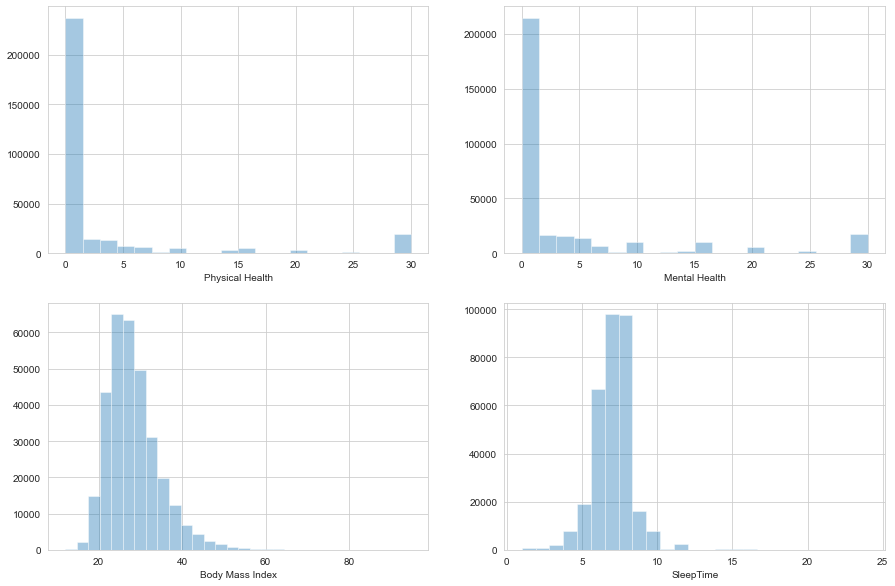

In [311]:
fig,ax = plt.subplots(2,2, figsize=(15,10))
sns.distplot(data['Physical Health'], kde=False, bins=20, hist=True, ax=ax[0][0])
sns.distplot(data['Mental Health'], kde=False, bins=20, hist=True, ax=ax[0][1])
sns.distplot(data['Body Mass Index'], kde=False, bins=30, hist=True, ax=ax[1][0])
sns.distplot(data['SleepTime'], kde=False, bins=25, hist=True, ax=ax[1][1])
plt.show()

<AxesSubplot:ylabel='Physical Health'>

<AxesSubplot:ylabel='Mental Health'>

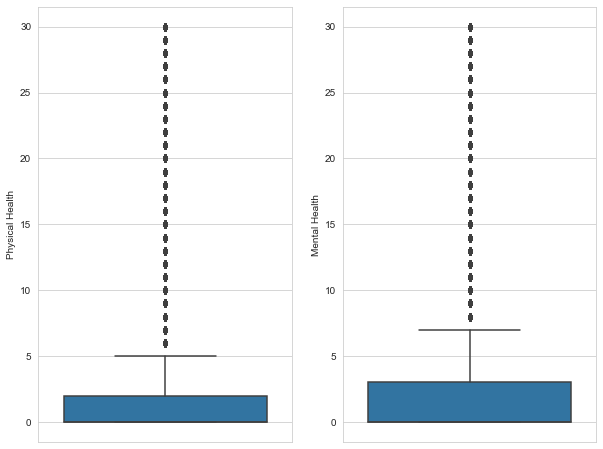

In [312]:
fig,ax = plt.subplots(1,2, figsize=(10,8))
sns.boxplot(y=data['Physical Health'], ax=ax[0])
sns.boxplot(y=data['Mental Health'], ax=ax[1])
plt.show()

C:\Users\EzekielJoaquim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Smoking', ylabel='count'>

C:\Users\EzekielJoaquim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol Drinking', ylabel='count'>

C:\Users\EzekielJoaquim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stroke', ylabel='count'>

C:\Users\EzekielJoaquim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Difficult Walking', ylabel='count'>

C:\Users\EzekielJoaquim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Physical Activity', ylabel='count'>

C:\Users\EzekielJoaquim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Asthma', ylabel='count'>

C:\Users\EzekielJoaquim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='KidneyDisease', ylabel='count'>

C:\Users\EzekielJoaquim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SkinCancer', ylabel='count'>

C:\Users\EzekielJoaquim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diabetic', ylabel='count'>

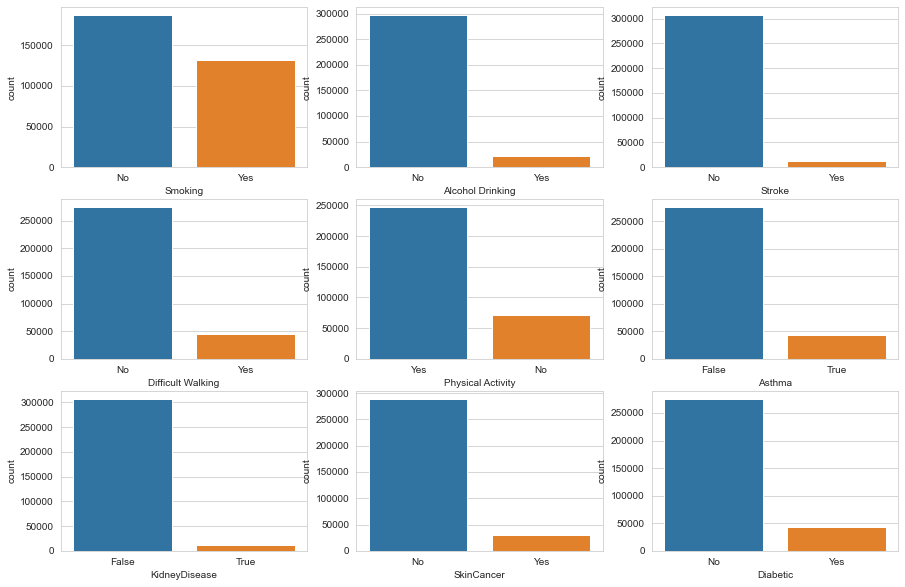

In [313]:
fig,ax = plt.subplots(3,3, figsize=(15,10))
sns.countplot(df['Smoking'], ax=ax[0][0])
sns.countplot(df['Alcohol Drinking'], ax=ax[0][1])
sns.countplot(df['Stroke'], ax=ax[0][2])
sns.countplot(df['Difficult Walking'], ax=ax[1][0])
sns.countplot(df['Physical Activity'], ax=ax[1][1])
sns.countplot(df['Asthma'], ax=ax[1][2])
sns.countplot(df['KidneyDisease'], ax=ax[2][0])
sns.countplot(df['SkinCancer'], ax=ax[2][1])
sns.countplot(df['Diabetic'], ax=ax[2][2])
plt.show()

In [314]:
data

,Heart Disease,Body Mass Index,Smoking,Alcohol Drinking,Stroke,Physical Health,Mental Health,Difficult Walking,Sex,Age,Race,Diabetic,Physical Activity,Health In General,SleepTime,Asthma,KidneyDisease,SkinCancer
0,False,20.80,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,False,False,No
1,False,32.54,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,False,False,No
2,False,31.09,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,False,False,No
3,False,22.85,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,False,False,No
11,False,27.44,No,No,No,0.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,False,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319785,False,25.77,Yes,No,No,2.00,0.00,No,Male,70.00,White,No,Yes,Very good,8,False,True,Yes
319791,True,32.96,Yes,No,No,2.00,0.00,No,Female,70.00,White,No,No,Very good,8,False,True,No
319792,False,31.62,No,No,No,2.00,0.00,Yes,Female,80.00,White,No,Yes,Very good,8,False,True,No
319793,False,23.18,No,No,No,2.00,0.00,No,Female,65.00,White,No,Yes,Very good,8,False,True,Yes


In [315]:
#defining a function that checks for inconsistency in the data

def f(row):
    if row['Physical Health'] > 5 & row['Health In General'] == "Very good":
        val = 'inconsistent'
    else:
        val = 'consistent'
    return val

In [ ]:
#custom function application
data['consistency_check'] = data[data].apply(f, axis=1)